In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
X1 = sps.chi2.rvs(size = 150, df = 2)
X2 = sps.norm.rvs(size = 150, loc = 3, scale = 1)
pooled = np.concatenate([X1, X2])
pd.DataFrame({"Выборочное среднее" : [X1.mean(), X2.mean(), pooled.mean()],
              "Выборочная оценка дисперсии" : [X1.var(), X2.var(), pooled.var()],
              "Выборочная оценка с.к.о" : [X1.std(), X2.std(), pooled.std()],
             }, index = ['X1', 'X2', 'pooled'])

,Выборочное среднее,Выборочная оценка дисперсии,Выборочная оценка с.к.о
X1,2.027619,4.221708,2.054680
X2,2.996467,1.025088,1.012466
pooled,2.512043,2.858065,1.690581


In [7]:
sps.pearsonr(X1, X2)

(0.02596871997163312, 0.7524252191862159)

In [8]:
sps.spearmanr(X1, X2)

SpearmanrResult(correlation=0.045234010400462245, pvalue=0.582560682948615)

In [9]:
sps.kendalltau(X1, X2)

KendalltauResult(correlation=0.0297986577181208, pvalue=0.5884264051705862)

In [10]:
import seaborn as sns

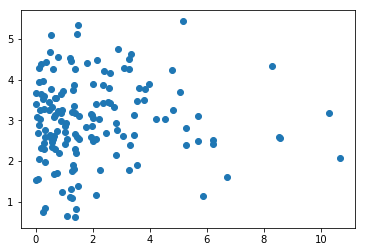

In [12]:
plt.scatter(X1, X2)

(array([[13., 22., 39., 20.,  6.],
        [ 0.,  5., 14.,  9.,  4.],
        [ 1.,  4.,  4.,  2.,  1.],
        [ 0.,  1.,  1.,  1.,  0.],
        [ 0.,  1.,  2.,  0.,  0.]]),
 array([ 0.0152373 ,  2.14681726,  4.27839722,  6.40997718,  8.54155714,
        10.6731371 ]),
 array([0.61456285, 1.58075809, 2.54695332, 3.51314856, 4.4793438 ,
        5.44553904]),
 <matplotlib.image.AxesImage at 0x2798deb3978>)

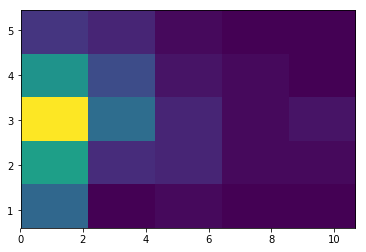

In [36]:
a = plt.hist2d(X1, X2, bins=5)
a

In [37]:
sps.chi2_contingency(a[0])

(11.083416193181817,
 0.8043073989747405,
 16,
 array([[ 9.33333333, 22.        , 40.        , 21.33333333,  7.33333333],
        [ 2.98666667,  7.04      , 12.8       ,  6.82666667,  2.34666667],
        [ 1.12      ,  2.64      ,  4.8       ,  2.56      ,  0.88      ],
        [ 0.28      ,  0.66      ,  1.2       ,  0.64      ,  0.22      ],
        [ 0.28      ,  0.66      ,  1.2       ,  0.64      ,  0.22      ]]))

In [59]:
lambda_values = np.linspace(0, 1, 100)
def u(lambdaa, x, y):
    return lambdaa * x + (1 - lambdaa) * y

def v(lambdaa, x, y):
    return lambdaa * x ** 3 + (1 - lambdaa) * y ** 3

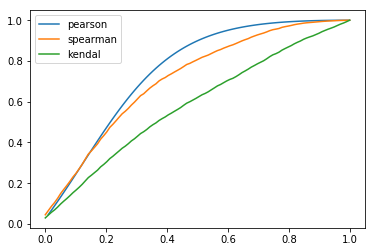

In [54]:
plt.plot(lambda_values, [sps.pearsonr(X1, u(lambdaa, X1, X2))[0] for lambdaa in lambda_values], label='pearson')
plt.plot(lambda_values, [sps.spearmanr(X1, u(lambdaa, X1, X2))[0] for lambdaa in lambda_values], label='spearman')
plt.plot(lambda_values, [sps.kendalltau(X1, u(lambdaa, X1, X2))[0] for lambdaa in lambda_values], label='kendal')
plt.legend()

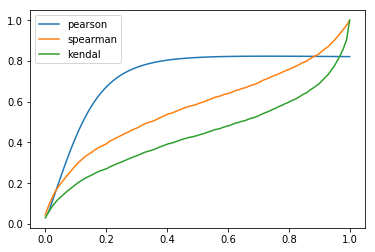

In [60]:
plt.plot(lambda_values, [sps.pearsonr(X1, v(lambdaa, X1, X2))[0] for lambdaa in lambda_values], label='pearson')
plt.plot(lambda_values, [sps.spearmanr(X1, v(lambdaa, X1, X2))[0] for lambdaa in lambda_values], label='spearman')
plt.plot(lambda_values, [sps.kendalltau(X1, v(lambdaa, X1, X2))[0] for lambdaa in lambda_values], label='kendal')
plt.legend()

Text(0.5,1,'V(X), lambda=0')

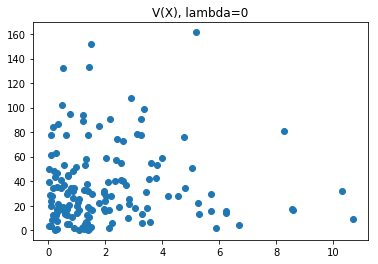

In [74]:
plt.scatter(X1, v(0, X1, X2))
plt.title('V(X), lambda=0')

Text(0.5,1,'ranks V(ranks X), lambda=0')

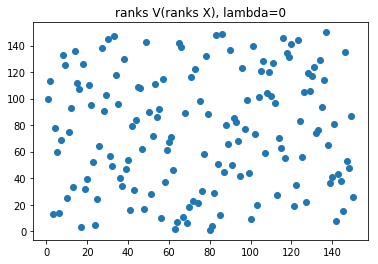

In [75]:
plt.scatter(sps.rankdata(X1), sps.rankdata(v(0, X1, X2)))
plt.title('ranks V(ranks X), lambda=0')

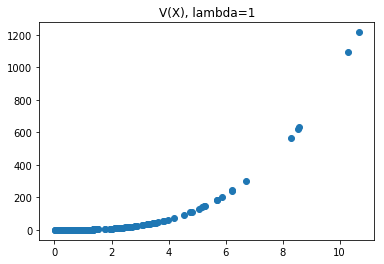

In [77]:
plt.title('V(X), lambda=1')
plt.scatter(X1, v(1, X1, X2))
#plt.plot(np.linspace(0,11,1000),[i**3 for i in np.linspace(0,11,1000)])


Text(0.5,1,'ranks V(ranks X), lambda=1')

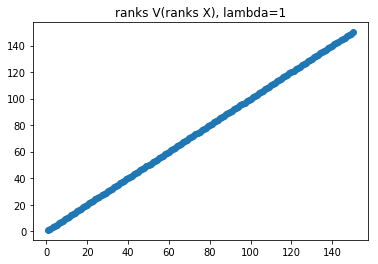

In [78]:
plt.scatter(sps.rankdata(X1), sps.rankdata(v(1, X1, X2)))
plt.title('ranks V(ranks X), lambda=1')